In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fdf2 = pd.read_csv('C:/Users/raclo/Documents/Bootcamp/Project 3/fdf2.csv', low_memory=False, sep=",")
fdf2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,distance,month,year,season,day_of_week,holiday,is_weekend,ride_duration
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,...,-77.072305,member,4.367593,1,2021,Winter,Friday,Yes,No,0 days 00:25:20
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,0,0,38.917193,-77.025894,...,-77.020000,casual,4.787179,1,2021,Winter,Friday,Yes,No,0 days 00:15:51
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,...,-77.031691,member,1.138843,1,2021,Winter,Friday,Yes,No,0 days 00:14:13
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,...,-77.114563,member,0.000000,1,2021,Winter,Friday,Yes,No,0 days 00:05:35
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,...,-77.032956,member,0.414050,1,2021,Winter,Friday,Yes,No,0 days 00:03:14


### Filter for 2022 and take a 25% sample

In [3]:
# Filter for the year 2022
fdf_2022 = fdf2[fdf2["year"] == 2022]

# Save to a new file
fdf_2022.to_csv("CBS_2022.csv", index=False)

print(f"Filtered dataset for 2022 saved with {len(fdf_2022)} rows.")

Filtered dataset for 2022 saved with 3476782 rows.


In [4]:
# Take a 25% random sample
fdf_2022_sampled = fdf_2022.sample(frac=0.25, random_state=42)

# Save to a new file
fdf_2022_sampled.to_csv("CBS_2022_sample.csv", index=False)

print(f"Sampled dataset for 2022 saved with {len(fdf_2022_sampled)} rows.")


Sampled dataset for 2022 saved with 869196 rows.


### Convert data types

In [7]:
# Convert categorical columns to category type for memory efficiency
fdf_2022_sampled["rideable_type"] = fdf_2022_sampled["rideable_type"].astype("category")
fdf_2022_sampled["start_station_name"] = fdf_2022_sampled["start_station_name"].astype("category")
fdf_2022_sampled["end_station_name"] = fdf_2022_sampled["end_station_name"].astype("category")
fdf_2022_sampled["member_casual"] = fdf_2022_sampled["member_casual"].astype("category")
fdf_2022_sampled["day_of_week"] = fdf_2022_sampled["day_of_week"].astype("category")
fdf_2022_sampled["holiday"] = fdf_2022_sampled["holiday"].astype("category")

# Convert started_at and ended_at to datetime for memory efficiency
fdf_2022_sampled['started_at'] = pd.to_datetime(fdf_2022_sampled['started_at'])
fdf_2022_sampled['ended_at'] = pd.to_datetime(fdf_2022_sampled['ended_at'])


fdf_2022_sampled['month'] = fdf_2022_sampled['month'].astype('int8')
fdf_2022_sampled["year"] = fdf_2022_sampled["year"].astype("str")

fdf_2022_sampled["ride_duration"] = pd.to_timedelta(fdf_2022_sampled["ride_duration"])

In [8]:
fdf_2022_sampled.dtypes

ride_id                         int64
rideable_type                category
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name           category
start_station_id               object
end_station_name             category
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                category
distance                      float64
month                            int8
year                           object
season                         object
day_of_week                  category
holiday                      category
is_weekend                     object
ride_duration         timedelta64[ns]
dtype: object

### Add Ward columns

In [9]:
pip install geopandas shapely pandas

Note: you may need to restart the kernel to use updated packages.


In [11]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# Load the wards GeoJSON file
wards_gdf = gpd.read_file("wards_from_2022.geojson")

# Load the bike-sharing dataset
df_2022_sampled = pd.read_csv(r"C:\Users\raclo\Documents\Bootcamp\Project 3\CBS_2022_sample.csv")  # Adjust if it's not in CSV format

# Convert DataFrame to GeoDataFrame using start station coordinates
df_2022_sampled["geometry"] = df_2022_sampled.apply(lambda row: Point(row["start_lng"], row["start_lat"]), axis=1)
gdf22 = gpd.GeoDataFrame(df_2022_sampled, geometry="geometry", crs="EPSG:4326")  # Assuming WGS84 projection

# Perform spatial join to get the corresponding ward for each station
gdf22 = gpd.sjoin(gdf22, wards_gdf, how="left", predicate="within")

# Keep only necessary columns
gdf22 = gdf22[["ride_id", "start_station_name", "WARD", "NAME"]]

# Save to a new CSV or use further
gdf22.to_csv("bikesharing_with_wards_22.csv", index=False)

In [12]:
gdf22

,ride_id,start_station_name,WARD,NAME
0,5130745,Crystal Dr & 20th St S,NaN,NaN
1,3099712,Woodley Park Metro / Calvert St & Connecticut ...,3.0,Ward 3
2,2777507,4th & E St SW,6.0,Ward 6
3,5150685,Maine Ave & 7th St SW,6.0,Ward 6
4,6012859,Convention Center / 7th & M St NW,2.0,Ward 2
...,...,...,...,...
869191,5379535,Jefferson Dr & 14th St SW,2.0,Ward 2
869192,4182078,0,6.0,Ward 6
869193,5348797,Connecticut Ave & Macomb St NW / Cleveland Park,3.0,Ward 3
869194,2857050,1st & Rhode Island Ave NW,5.0,Ward 5


In [20]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point


In [21]:
# Load the bikesharing dataset
fdf = pd.read_csv("CBS_2022_sample.csv")  # Adjust format if needed

# Load the wards GeoJSON
wards = gpd.read_file("wards_from_2022.geojson")

In [22]:
# Convert start station coordinates to geometry points
fdf['geometry'] = fdf.apply(lambda row: Point(row['start_lng'], row['start_lat']), axis=1)

# Convert to GeoDataFrame
fdf_gdf22 = gpd.GeoDataFrame(fdf, geometry='geometry', crs="EPSG:4326")

In [23]:
fdf_gdf22 = gpd.sjoin(fdf_gdf22, wards[['WARD', 'geometry']], how="left", predicate="within")

# Rename the column for clarity
fdf_gdf22.rename(columns={'WARD': 'start_ward'}, inplace=True)


In [24]:
# Convert end station coordinates to geometry points
fdf['end_geometry'] = fdf.apply(lambda row: Point(row['end_lng'], row['end_lat']), axis=1)

# Convert to GeoDataFrame
fdf_gdf_end = gpd.GeoDataFrame(fdf, geometry='end_geometry', crs="EPSG:4326")

# Spatial join for end stations
fdf_gdf_end = gpd.sjoin(fdf_gdf_end, wards[['WARD', 'geometry']], how="left", predicate="within")

# Rename column
fdf_gdf_end.rename(columns={'WARD': 'end_ward'}, inplace=True)

# Merge back with the main dataset
fdf_gdf22['end_ward'] = fdf_gdf_end['end_ward']


### New working dataframe for 2022: fdf_gdf22

In [25]:
fdf_gdf22.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,year,season,day_of_week,holiday,is_weekend,ride_duration,geometry,index_right,start_ward,end_ward
0,5130745,classic_bike,2022-09-05 15:11:26,2022-09-05 15:58:47,Crystal Dr & 20th St S,31002.0,39th & Veazey St NW,31308.0,38.856425,-77.049232,...,2022,Autumn,Monday,Yes,No,0 days 00:47:21,POINT (-77.04923 38.85642),NaN,NaN,3.0
1,3099712,classic_bike,2022-03-13 12:44:09,2022-03-13 12:49:45,Woodley Park Metro / Calvert St & Connecticut ...,31323.0,18th St & Wyoming Ave NW,31114.0,38.923389,-77.051833,...,2022,Spring,Sunday,No,Yes,0 days 00:05:36,POINT (-77.05183 38.92339),6.0,3.0,1.0
2,2777507,classic_bike,2022-01-10 21:29:14,2022-01-10 21:34:09,4th & E St SW,31244.0,4th & M St SW,31108.0,38.884120,-77.017445,...,2022,Winter,Monday,No,No,0 days 00:04:55,POINT (-77.01744 38.88412),1.0,6.0,6.0
3,5150685,docked_bike,2022-09-07 16:11:54,2022-09-07 16:27:23,Maine Ave & 7th St SW,31609.0,1st St & Potomac Ave SE,31668.0,38.878694,-77.023054,...,2022,Autumn,Wednesday,No,No,0 days 00:15:29,POINT (-77.02305 38.87869),1.0,6.0,8.0
4,6012859,classic_bike,2022-11-24 21:11:02,2022-11-24 21:39:54,Convention Center / 7th & M St NW,31223.0,3rd & D St SE,31605.0,38.905737,-77.022270,...,2022,Autumn,Thursday,Yes,No,0 days 00:28:52,POINT (-77.02227 38.90574),3.0,2.0,6.0


In [26]:
print(fdf_gdf22['start_ward'].isna().sum())
print(fdf_gdf22['end_ward'].isna().sum())

99891
99699


In [ ]:
fdf_gdf22.dropna(subset=['start_ward', 'end_ward'], inplace=True)

In [30]:
fdf_gdf22.drop(columns=['index_right', 'geometry'], inplace=True)

In [31]:
fdf_gdf22.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,distance,month,year,season,day_of_week,holiday,is_weekend,ride_duration,start_ward,end_ward
1,3099712,classic_bike,2022-03-13 12:44:09,2022-03-13 12:49:45,Woodley Park Metro / Calvert St & Connecticut ...,31323.0,18th St & Wyoming Ave NW,31114.0,38.923389,-77.051833,...,1.023477,3,2022,Spring,Sunday,No,Yes,0 days 00:05:36,3.0,1.0
2,2777507,classic_bike,2022-01-10 21:29:14,2022-01-10 21:34:09,4th & E St SW,31244.0,4th & M St SW,31108.0,38.884120,-77.017445,...,0.826329,1,2022,Winter,Monday,No,No,0 days 00:04:55,6.0,6.0
3,5150685,docked_bike,2022-09-07 16:11:54,2022-09-07 16:27:23,Maine Ave & 7th St SW,31609.0,1st St & Potomac Ave SE,31668.0,38.878694,-77.023054,...,1.668302,9,2022,Autumn,Wednesday,No,No,0 days 00:15:29,6.0,8.0
4,6012859,classic_bike,2022-11-24 21:11:02,2022-11-24 21:39:54,Convention Center / 7th & M St NW,31223.0,3rd & D St SE,31605.0,38.905737,-77.022270,...,2.872739,11,2022,Autumn,Thursday,Yes,No,0 days 00:28:52,2.0,6.0
5,3630578,electric_bike,2022-05-05 20:08:53,2022-05-05 20:11:22,0,0.0,Eckington Pl & Q St NE,31505.0,38.910000,-77.010000,...,0.450115,5,2022,Spring,Thursday,No,No,0 days 00:02:29,5.0,5.0


In [32]:
fdf_gdf22['start_ward'] = fdf_gdf22['start_ward'].astype('int')
fdf_gdf22['end_ward'] = fdf_gdf22['end_ward'].astype('int')

In [34]:
# Check unique values for start and end wards
unique_values_start = sorted(fdf_gdf22['start_ward'].unique())
unique_values_end = sorted(fdf_gdf22['end_ward'].unique())
print(unique_values_start)
print(unique_values_end)

[1, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 3, 4, 5, 6, 7, 8]


### Cleaning

In [35]:
print(f"Number of rows before cleaning: {len(fdf_gdf22)}")

Number of rows before cleaning: 751707


In [36]:
# Convert 'ride_duration' column to Timedelta if it's not already
fdf_gdf22["ride_duration"] = pd.to_timedelta(fdf_gdf22["ride_duration"], errors='coerce')

In [37]:
# Drop rows where ride_duration is negative 

fdf_gdf = fdf_gdf22[fdf_gdf22["ride_duration"] >= pd.Timedelta(0)]

# Verify the result
print(f"Number of rows after cleaning: {len(fdf_gdf22)}")

Number of rows after cleaning: 751707


In [ ]:
# Overwrite fdf_gdf22 by dropping rows where 'end_station_name' is '0'
fdf_gdf22 = fdf_gdf22[fdf_gdf22["end_station_name"] != "0"]

# Verify the result
print(f"Number of rows after cleaning: {len(fdf_gdf22)}")

Number of rows after cleaning: 720219


In [39]:
# Overwrite fdf_gdf22 by dropping rows where "ride_distance" is 0
fdf_gdf22 = fdf_gdf22[fdf_gdf22["distance"] != 0]

# Verify the result
print(f"Number of rows after cleaning: {len(fdf_gdf22)}")

Number of rows after cleaning: 687758


In [40]:
# If ride_duration is in Timedelta format, create ride_duration_min
fdf_gdf22["ride_duration_min"] = fdf_gdf22["ride_duration"].dt.total_seconds() / 60

In [42]:
# Drop rows where ride_duration_min is 0
fdf_gdf22 = fdf_gdf22[fdf_gdf22["ride_duration_min"] != 0]

# Optionally, check the result
print(f"Number of rows after cleaning: {len(fdf_gdf22)}")

Number of rows after cleaning: 687744


### Ride Distance 

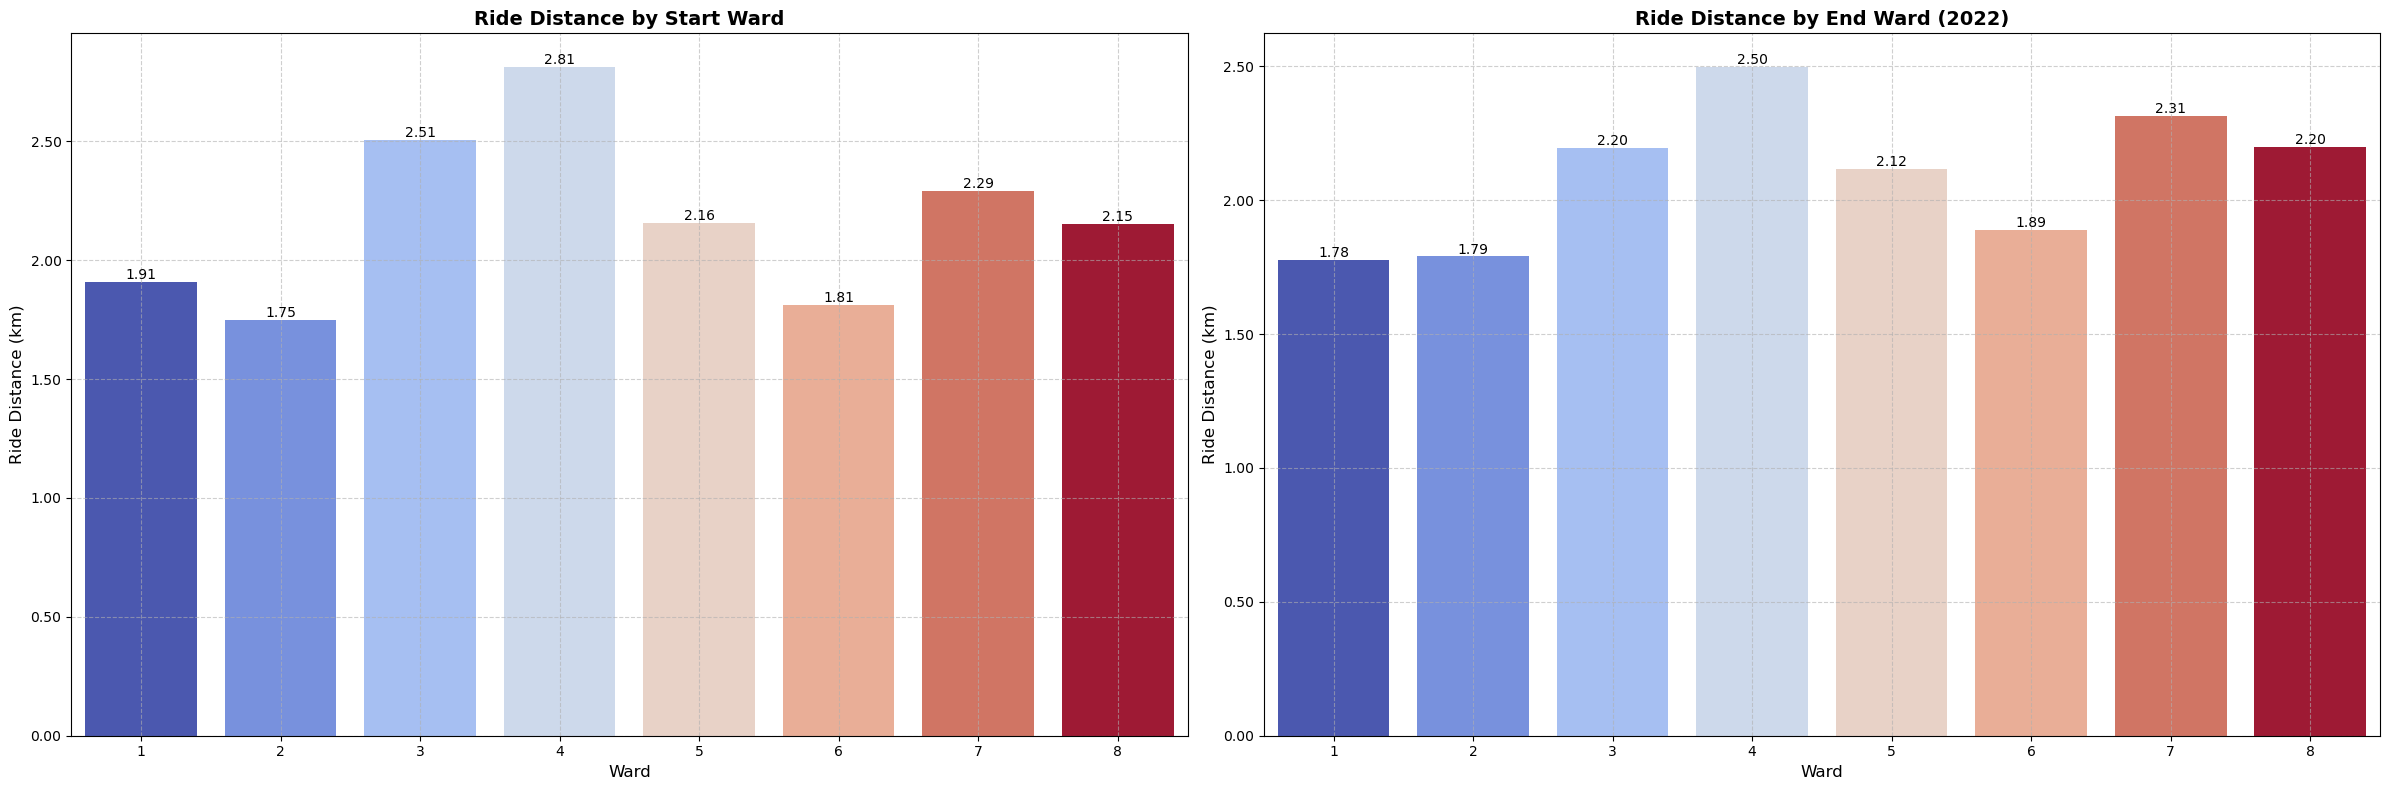

In [45]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Plot for Ride Distance by Start Ward
sns.barplot(x="start_ward", 
            y="distance", 
            data=fdf_gdf22,
            palette="coolwarm",
            hue="start_ward",  
            errorbar=None,
            ax=axs[0],
            legend=False 
            )  

# Format y-axis to show two decimals
axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[0].grid(True, linestyle="--", alpha=0.6)

# Add labels on top of each bar
for p in axs[0].patches:
    height = p.get_height()
    if height > 0.01:
        axs[0].annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', 
                        va='center', 
                        fontsize=10, 
                        color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

# Improve labels and title
axs[0].set_xlabel("Ward", fontsize=12)
axs[0].set_ylabel("Ride Distance (km)", fontsize=12)
axs[0].set_title("Ride Distance by Start Ward", fontsize=14, fontweight="bold")

# Plot for Ride Distance by End Ward
sns.barplot(x="end_ward", 
            y="distance", 
            data=fdf_gdf22,
            palette="coolwarm",
            hue="end_ward", 
            errorbar=None,
            ax=axs[1],
            legend=False 
            )  

# Format y-axis to show two decimals
axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[1].grid(True, linestyle="--", alpha=0.6)

# Add labels on top of each bar
for p in axs[1].patches:
    height = p.get_height()
    if height > 0.01:
        axs[1].annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', 
                        va='center', 
                        fontsize=10, 
                        color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')

# Improve labels and title
axs[1].set_xlabel("Ward", fontsize=12)
axs[1].set_ylabel("Ride Distance (km)", fontsize=12)
axs[1].set_title("Ride Distance by End Ward (2022)", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

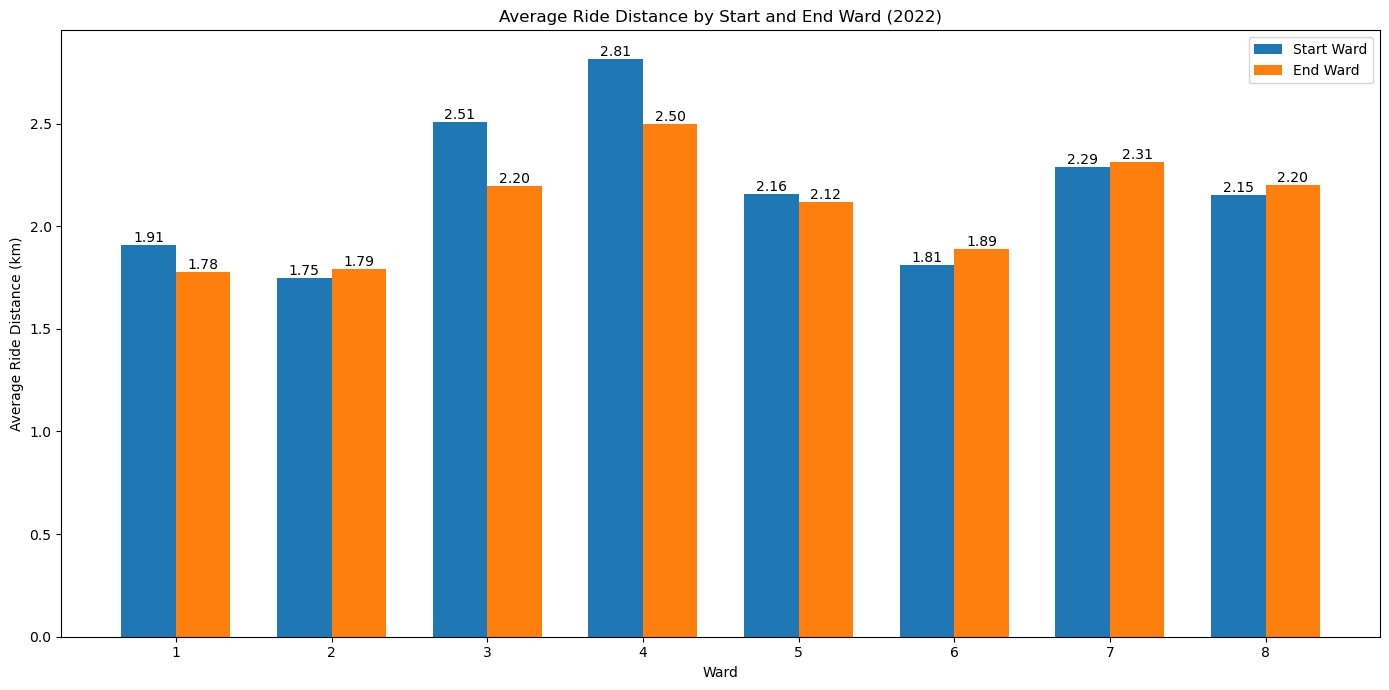

In [163]:
import seaborn as sns

import matplotlib.pyplot as plt

# Prepare the data for plotting
start_ward_distances = fdf_gdf22.groupby('start_ward')['distance'].mean().reset_index()
end_ward_distances = fdf_gdf22.groupby('end_ward')['distance'].mean().reset_index()

# Merge the dataframes on ward
ward_distances = pd.merge(start_ward_distances, end_ward_distances, left_on='start_ward', right_on='end_ward', suffixes=('_start', '_end'))

# Plot the data
plt.figure(figsize=(14, 7))
bar_width = 0.35
index = np.arange(len(ward_distances))
# Bar plot for start ward distances
bars_start = plt.bar(index, ward_distances['distance_start'], bar_width, label='Start Ward')

# Bar plot for end ward distances
bars_end = plt.bar(index + bar_width, ward_distances['distance_end'], bar_width, label='End Ward')

# Add labels on top of each bar
for bar in bars_start:
    height = bar.get_height()
    if height > 0:  # Optionally filter out zero-height bars
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars_end:
    height = bar.get_height()
    if height > 0:  # Optionally filter out zero-height bars
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)


# Add labels and title
plt.xlabel('Ward')
plt.ylabel('Average Ride Distance (km)')
plt.title('Average Ride Distance by Start and End Ward (2022)')
plt.xticks(index + bar_width / 2, ward_distances['start_ward'])
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Ride Duration

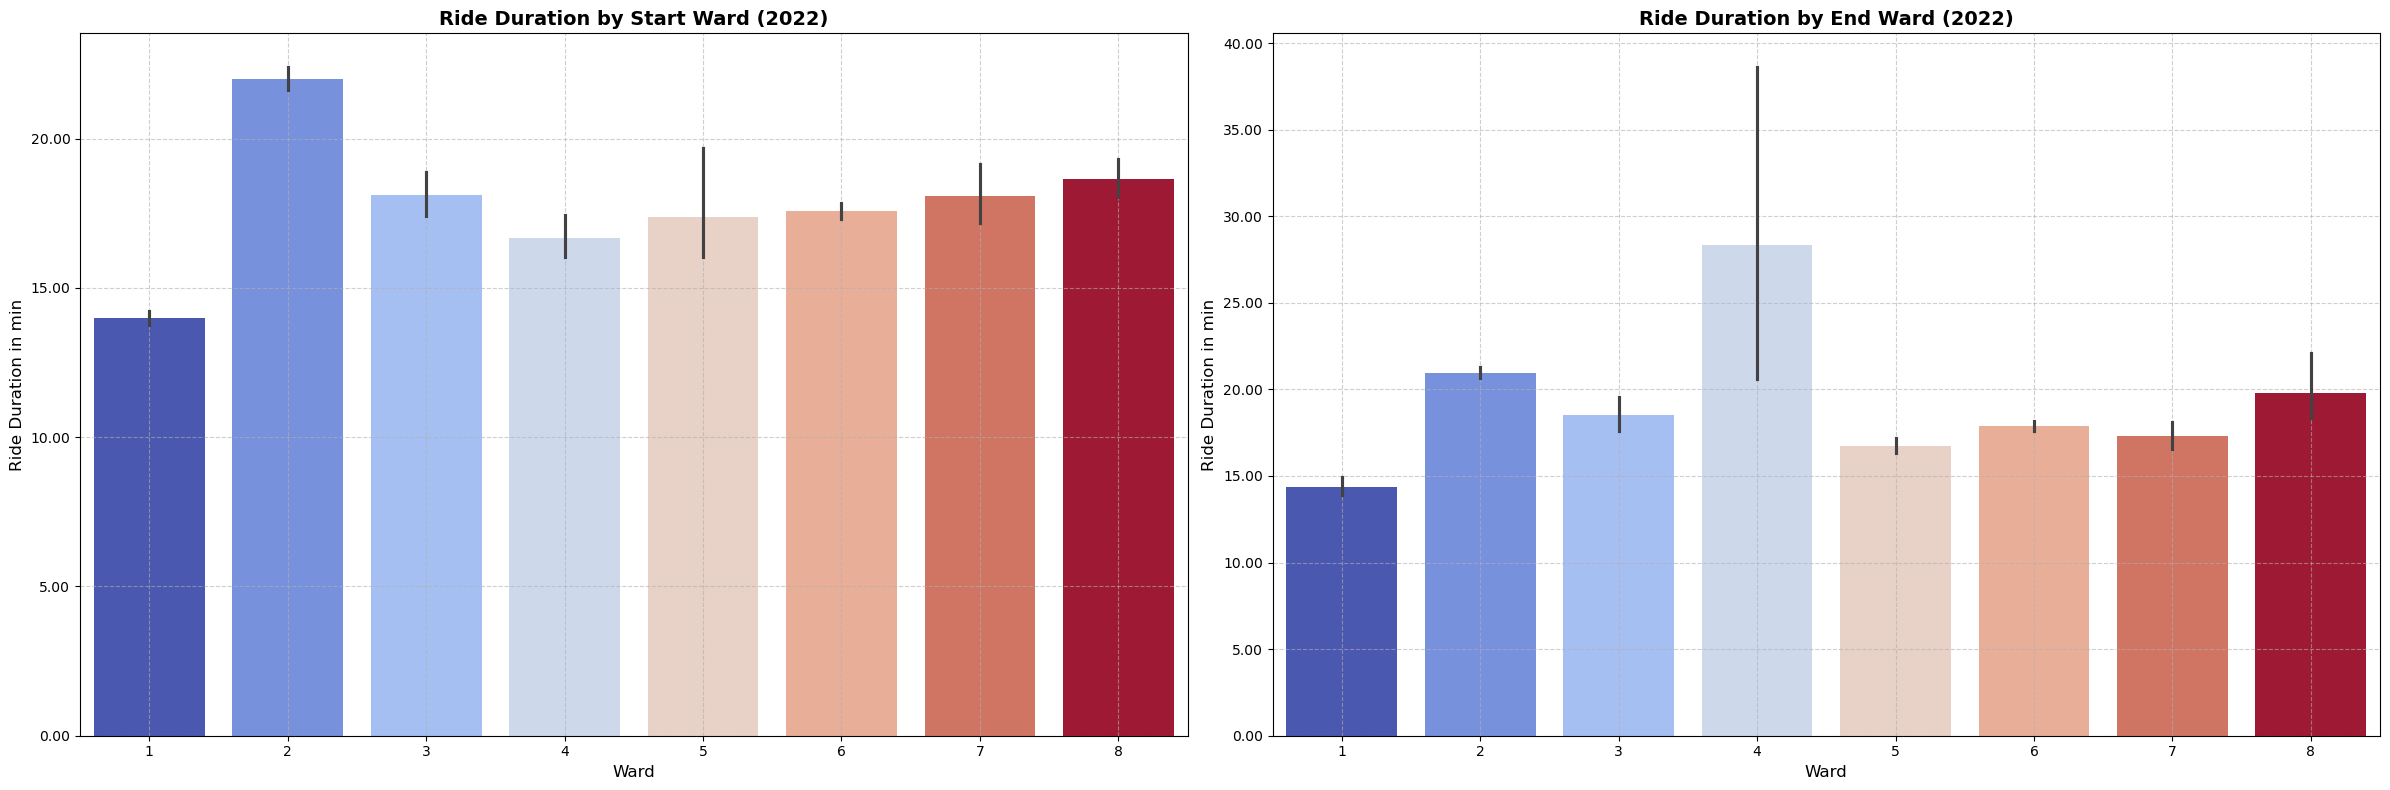

In [52]:
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(24, 8))

# Plot for Ride Duration by Start Ward
sns.barplot(x="start_ward", 
            y="ride_duration_min", 
            data=fdf_gdf22,
            hue="start_ward",
            palette="coolwarm",
            legend=False,
            ax=axs[0]
            )  

# Format y-axis to show two decimals
axs[0].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[0].grid(True, linestyle="--", alpha=0.6)

# Improve labels and title
axs[0].set_xlabel("Ward", fontsize=12)
axs[0].set_ylabel("Ride Duration in min", fontsize=12)
axs[0].set_title("Ride Duration by Start Ward (2022)", fontsize=14, fontweight="bold")

# Plot for Ride Duration by End Ward
sns.barplot(x="end_ward", 
            y="ride_duration_min", 
            data=fdf_gdf22,
            hue="end_ward",
            palette="coolwarm",
            legend=False,
            ax=axs[1]
            )  

# Format y-axis to show two decimals
axs[1].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.2f}"))

# Add grid for better visualization
axs[1].grid(True, linestyle="--", alpha=0.6)

# Improve labels and title
axs[1].set_xlabel("Ward", fontsize=12)
axs[1].set_ylabel("Ride Duration in min", fontsize=12)
axs[1].set_title("Ride Duration by End Ward (2022)", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

### Check for longer rides > 5 days

In [51]:
import pandas as pd

# Ensure ride_duration is a Timedelta type
fdf_gdf22['ride_duration'] = pd.to_timedelta(fdf_gdf22['ride_duration'])

# Filter rides that lasted more than 5 days
long_rides = fdf_gdf22[fdf_gdf22['ride_duration'] > pd.Timedelta(days=5)]

# Display the filtered DataFrame
long_rides.head(20)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,month,year,season,day_of_week,holiday,is_weekend,ride_duration,start_ward,end_ward,ride_duration_min
36592,3952830,docked_bike,2022-06-04 15:01:37,2022-06-27 14:42:16,11th & S St NW,31280.0,8th & O St NW,31281.0,38.913761,-77.027025,...,6,2022,Summer,Saturday,No,Yes,22 days 23:40:39,2,2,33100.650000
99057,5699253,docked_bike,2022-10-23 13:31:32,2022-11-01 15:37:37,1st & Washington Hospital Center NW,31507.0,5th & Kennedy St NW,31403.0,38.928743,-77.012457,...,10,2022,Autumn,Sunday,No,Yes,9 days 02:06:05,5,4,13086.083333
231644,5751151,docked_bike,2022-10-28 10:03:41,2022-11-03 09:25:39,4th St & Madison Dr NW,31288.0,17th & G St NW,31277.0,38.890496,-77.017247,...,10,2022,Autumn,Friday,No,No,5 days 23:21:58,2,2,8601.966667
282256,4344650,docked_bike,2022-07-04 11:53:59,2022-07-10 18:14:53,Henry Bacon Dr & Lincoln Memorial Circle NW,31289.0,6035 Warehouse,32901.0,38.890539,-77.049383,...,7,2022,Summer,Monday,Yes,No,6 days 06:20:54,2,4,9020.900000
394854,3914890,docked_bike,2022-06-01 12:10:58,2022-06-06 13:18:56,King Greenleaf Rec Center,31654.0,6035 Warehouse,32901.0,38.876211,-77.012443,...,6,2022,Summer,Wednesday,No,No,5 days 01:07:58,6,4,7267.966667
461880,3049323,docked_bike,2022-03-05 16:50:11,2022-03-17 00:05:08,8th & O St NW,31281.0,14th & Otis Pl NW,31131.0,38.908640,-77.022770,...,3,2022,Spring,Saturday,No,Yes,11 days 07:14:57,2,1,16274.950000
463335,4602247,docked_bike,2022-07-24 12:09:48,2022-08-03 12:10:11,Smithsonian-National Mall / Jefferson Dr & 12t...,31248.0,6th St & Indiana Ave NW,31264.0,38.888774,-77.028694,...,7,2022,Summer,Sunday,No,Yes,10 days 00:00:23,2,2,14400.383333
472309,2772999,docked_bike,2022-01-09 11:58:48,2022-01-21 18:46:19,15th St & Constitution Ave NW,31321.0,6035 Warehouse,32901.0,38.892244,-77.033234,...,1,2022,Winter,Sunday,No,Yes,12 days 06:47:31,2,4,17687.516667
561943,4971547,docked_bike,2022-08-23 20:27:59,2022-08-30 18:41:32,4th & G St SW,31666.0,New Jersey Ave & K St NW,31642.0,38.881117,-77.017699,...,8,2022,Summer,Tuesday,No,No,6 days 22:13:33,6,6,9973.550000
562873,4546843,docked_bike,2022-07-19 21:19:54,2022-07-27 10:36:11,1st & M St NE,31603.0,6035 Warehouse,32901.0,38.905697,-77.005483,...,7,2022,Summer,Tuesday,No,No,7 days 13:16:17,6,4,10876.283333


### Ride Count

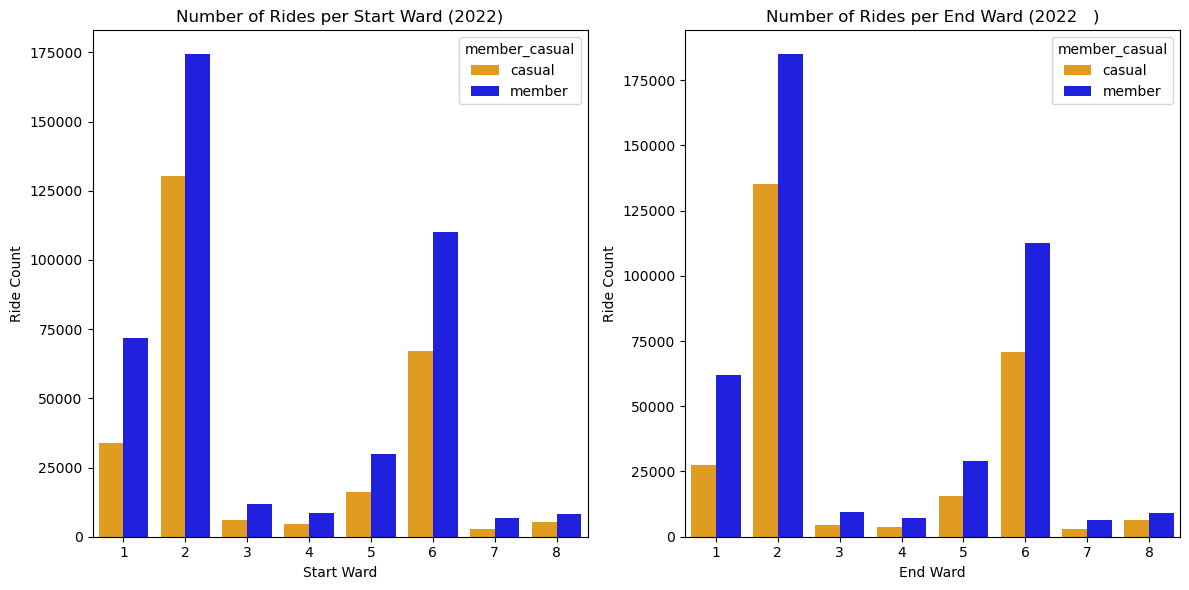

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom palette with different colors for each member type
palette = {"member": "blue", "casual": "orange"}

# Merge start_ward_counts and end_ward_counts with fdf_gdf22 to include member_casual
start_ward_counts = fdf_gdf22.groupby(['start_ward', 'member_casual'], observed=True).size().reset_index(name='ride_count')
end_ward_counts = fdf_gdf22.groupby(['end_ward', 'member_casual'], observed=True).size().reset_index(name='ride_count')

# Set the size of the plots
plt.figure(figsize=(12, 6))

# Plot the rides per start ward
plt.subplot(1, 2, 1)
sns.barplot(data=start_ward_counts, x="start_ward", y="ride_count", hue="member_casual", palette=palette)
plt.title('Number of Rides per Start Ward (2022)')
plt.xlabel('Start Ward')
plt.ylabel('Ride Count')

# Plot the rides per end ward
plt.subplot(1, 2, 2)
sns.barplot(data=end_ward_counts, x="end_ward", y="ride_count", hue="member_casual", palette=palette)
plt.title('Number of Rides per End Ward (2022   )')
plt.xlabel('End Ward')
plt.ylabel('Ride Count')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

C:\Users\raclo\AppData\Local\Temp\ipykernel_21104\354912470.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=start_ward_share_df, x='Ward', y='Share (%)', palette='coolwarm', ax=axs[0])
C:\Users\raclo\AppData\Local\Temp\ipykernel_21104\354912470.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=end_ward_share_df, x='Ward', y='Share (%)', palette='coolwarm', ax=axs[1])


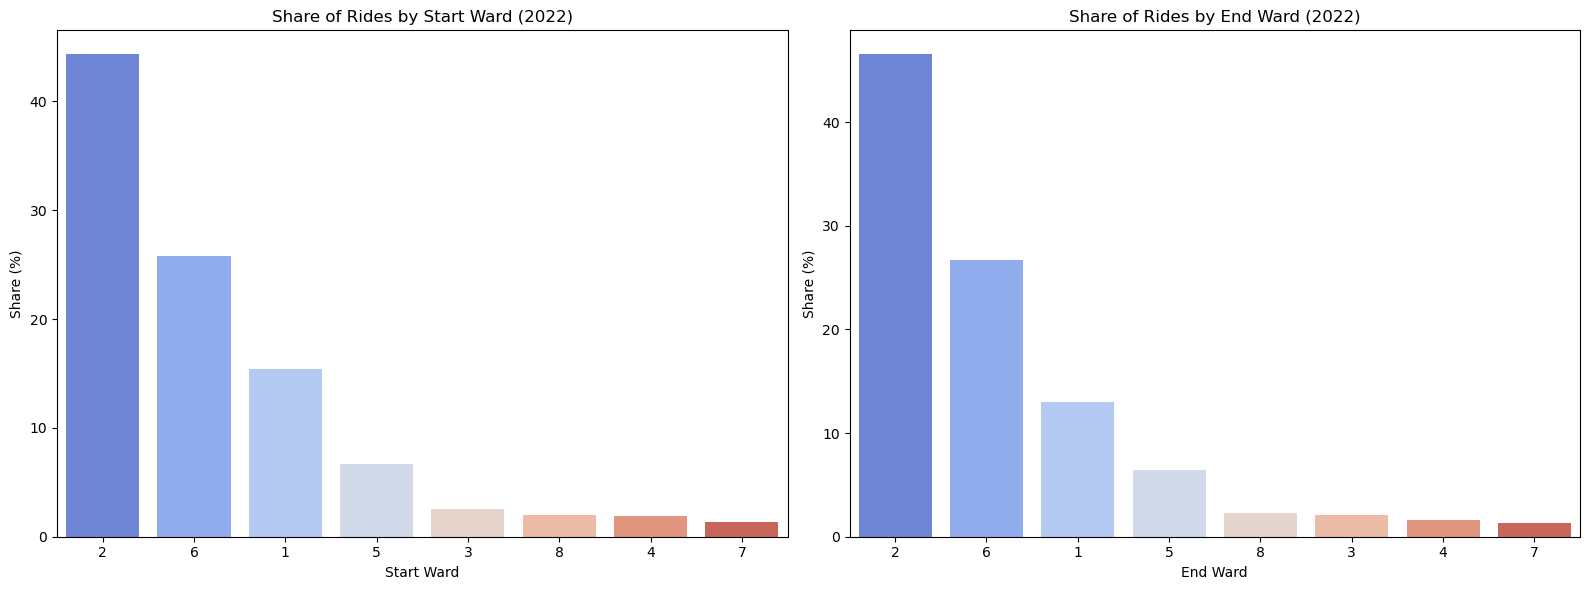

In [166]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the share of rides by start and end ward
start_ward_share = fdf_gdf22['start_ward'].value_counts(normalize=True) * 100
end_ward_share = fdf_gdf22['end_ward'].value_counts(normalize=True) * 100

# Convert to DataFrame for easier plotting
start_ward_share_df = start_ward_share.reset_index()
start_ward_share_df.columns = ['Ward', 'Share (%)']

end_ward_share_df = end_ward_share.reset_index()
end_ward_share_df.columns = ['Ward', 'Share (%)']

# Plot the data
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Start ward share plot
sns.barplot(data=start_ward_share_df, x='Ward', y='Share (%)', palette='coolwarm', ax=axs[0])
axs[0].set_title('Share of Rides by Start Ward (2022)')
axs[0].set_xlabel('Start Ward')
axs[0].set_ylabel('Share (%)')

# End ward share plot
sns.barplot(data=end_ward_share_df, x='Ward', y='Share (%)', palette='coolwarm', ax=axs[1])
axs[1].set_title('Share of Rides by End Ward (2022)')
axs[1].set_xlabel('End Ward')
axs[1].set_ylabel('Share (%)')

plt.tight_layout()
plt.show()

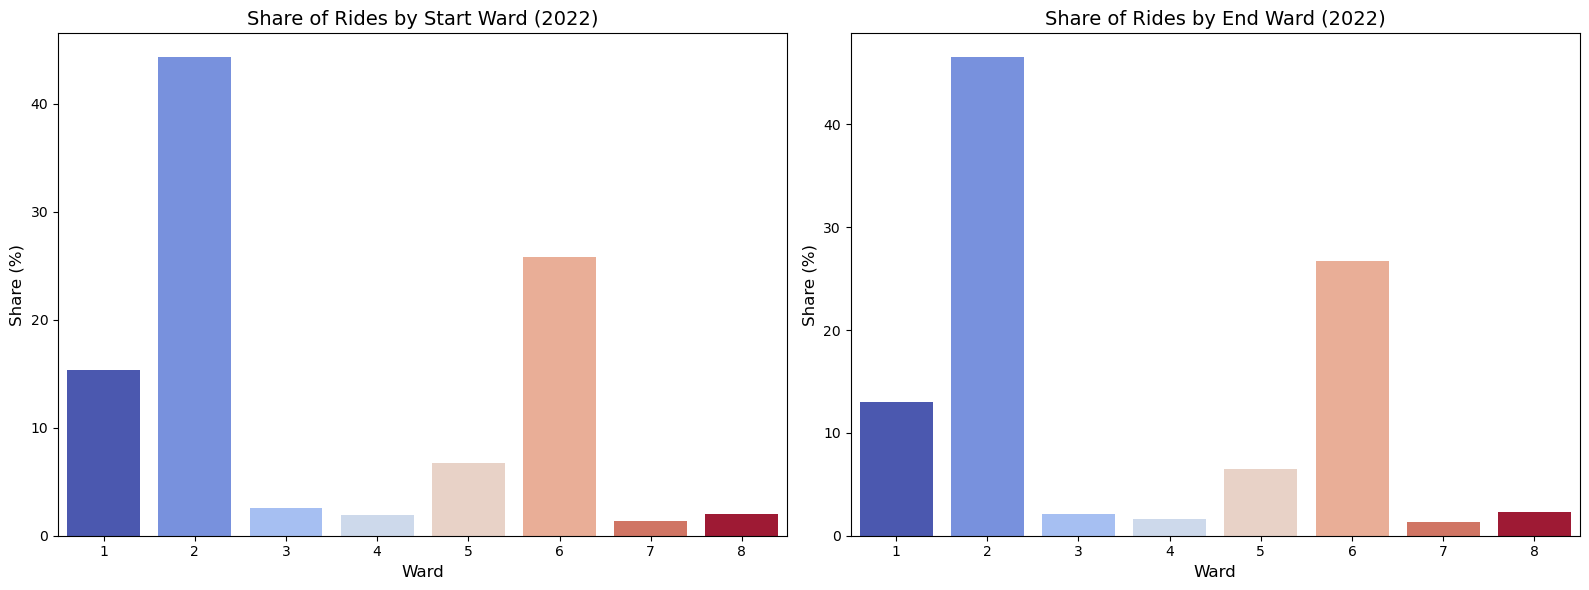

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the ward_share_df by Ward in ascending order
ward_share_df_sorted = ward_share_df.sort_values(by='Ward')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Start Ward Share
sns.barplot(
    data=ward_share_df_sorted,
    x='Ward',
    y='Start Ward Share',
    hue='Ward',
    palette='coolwarm',
    ax=axs[0],
    legend=False
)
axs[0].set_title('Share of Rides by Start Ward (2022)', fontsize=14)
axs[0].set_xlabel('Ward', fontsize=12)
axs[0].set_ylabel('Share (%)', fontsize=12)

# Plot for End Ward Share
sns.barplot(
    data=ward_share_df_sorted,
    x='Ward',
    y='End Ward Share',
    hue='Ward', 
    palette='coolwarm',
    ax=axs[1],
    legend=False
)
axs[1].set_title('Share of Rides by End Ward (2022)', fontsize=14)
axs[1].set_xlabel('Ward', fontsize=12)
axs[1].set_ylabel('Share (%)', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

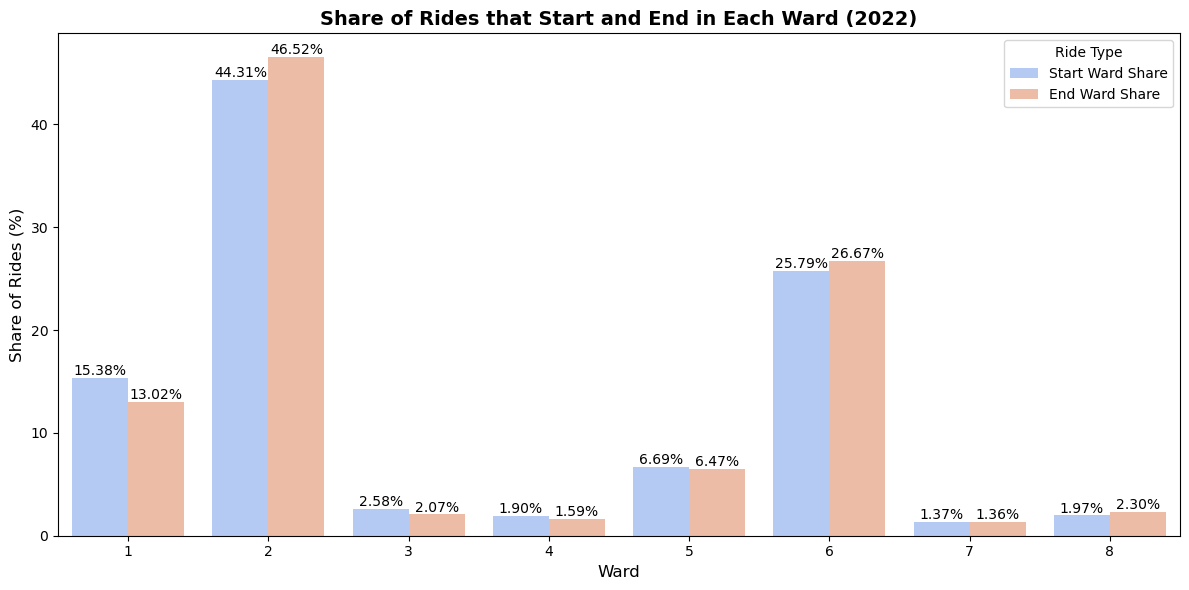

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the share of rides that start in each ward
start_ward_share = fdf_gdf22['start_ward'].value_counts(normalize=True).sort_index() * 100

# Calculate the share of rides that end in each ward
end_ward_share = fdf_gdf22['end_ward'].value_counts(normalize=True).sort_index() * 100

# Create a DataFrame for easier plotting
ward_share_df = pd.DataFrame({
    'Start Ward Share': start_ward_share,
    'End Ward Share': end_ward_share
}).reset_index().rename(columns={'index': 'Ward'})

# Plot the data
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x='Ward', 
    y='value', 
    hue='variable', 
    data=pd.melt(ward_share_df, id_vars=['Ward'], value_vars=['Start Ward Share', 'End Ward Share']), 
    palette='coolwarm'
)

# Add labels on top of each bar, but only if the height is greater than 0
for p in ax.patches:
    height = p.get_height()
    if height > 0.01:  # Avoid showing labels for bars with nearly 0%
        ax.annotate(f'{height:.2f}%', 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', 
                    va='center', 
                    fontsize=10, 
                    color='black', 
                    xytext=(0, 5),  # Offset the text above the bar
                    textcoords='offset points')

plt.xlabel('Ward', fontsize=12)
plt.ylabel('Share of Rides (%)', fontsize=12)
plt.title('Share of Rides that Start and End in Each Ward (2022)', fontsize=14, fontweight='bold')
plt.legend(title='Ride Type')

# Show the plot
plt.tight_layout()
plt.show()

### Mean rides per day and per Ward

In [ ]:
# Ensure 'started_at' is in datetime format
fdf_gdf22['started_at'] = pd.to_datetime(fdf_gdf22['started_at'])

# Group by start_ward and date, then count the number of rides per day
rides_per_day = fdf_gdf22.groupby([fdf_gdf22['started_at'].dt.date, 'start_ward']).size().reset_index(name='ride_count')

# Calculate the mean number of rides per day for each ward
mean_rides_per_day = rides_per_day.groupby('start_ward')['ride_count'].mean().reset_index(name='mean_rides_per_day')

# Display the result
print(mean_rides_per_day)

  start_ward  mean_rides_per_day
0          1          289.879452
1          2          834.969863
2          3           48.663014
3          4           35.802740
4          5          126.057534
5          6          485.901370
6          7           25.824658
7          8           37.233516


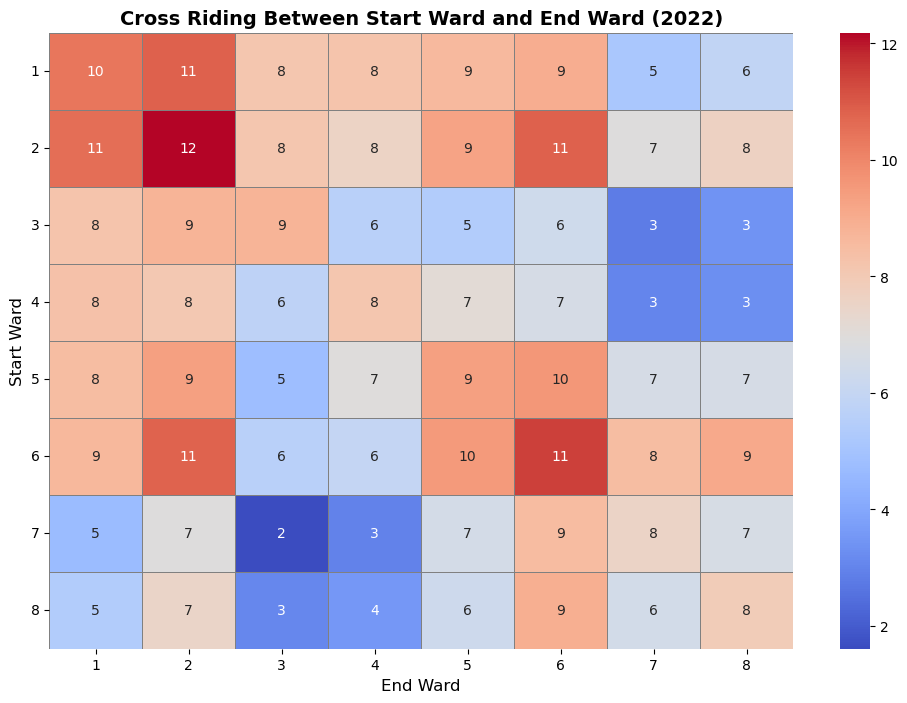

In [61]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a pivot table to count the rides between start_ward and end_ward
cross_riding = fdf_gdf22.pivot_table(index='start_ward', columns='end_ward', values='ride_id', aggfunc='count', fill_value=0)

# Apply log scale transformation if necessary (optional)
cross_riding_log = np.log1p(cross_riding)  # log(1 + x) to avoid log(0) issues

plt.figure(figsize=(12, 8))

# Create heatmap with formatting improvements
ax = sns.heatmap(cross_riding_log, 
                 annot=True, 
                 fmt=".0f",  # Use integer format (rounded)
                 cmap="coolwarm",  # Better contrast
                 cbar=True, 
                 linewidths=0.5,  # Add thin grid lines
                 linecolor="gray")

# Improve readability
plt.title('Cross Riding Between Start Ward and End Ward (2022)', fontsize=14, fontweight="bold")
plt.xlabel('End Ward', fontsize=12)
plt.ylabel('Start Ward', fontsize=12)

# Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()

### Number of stations for Ward 2 and 7

In [62]:
# Filter for Ward 2 and Ward 7
ward_2_stations = fdf_gdf22[fdf_gdf22['start_ward'] == 2]['start_station_name'].nunique()
ward_7_stations = fdf_gdf22[fdf_gdf22['start_ward'] == 7]['start_station_name'].nunique()

print(f"Total number of stations in Ward 2: {ward_2_stations}")
print(f"Total number of stations in Ward 7: {ward_7_stations}")

Total number of stations in Ward 2: 105
Total number of stations in Ward 7: 33


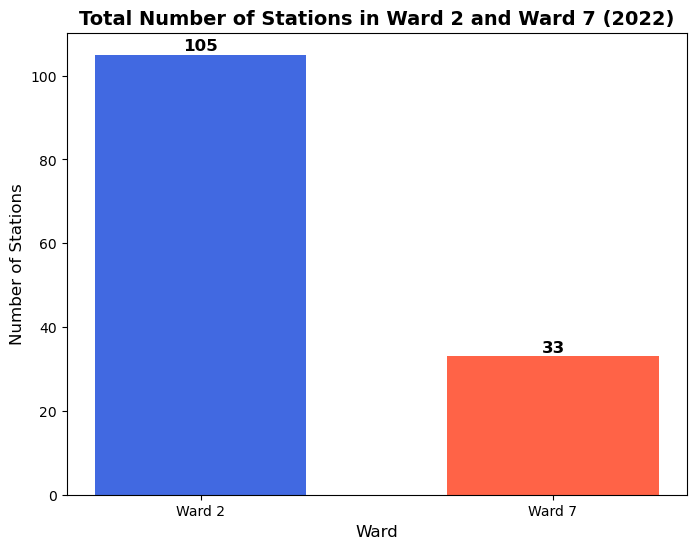

In [63]:
import matplotlib.pyplot as plt

# Data for the plot
wards = ['Ward 2', 'Ward 7']
stations = [ward_2_stations, ward_7_stations]

# Create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(wards, stations, color=['royalblue', 'tomato'], width=0.6)

# Add labels on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,  # Position slightly above the bar
            f"{int(bar.get_height()):,}",  # Format with commas (adjust if needed)
            ha='center', fontsize=12, fontweight='bold', color='black')

# Add labels and title
plt.xlabel('Ward', fontsize=12)
plt.ylabel('Number of Stations', fontsize=12)
plt.title('Total Number of Stations in Ward 2 and Ward 7 (2022)', fontsize=14, fontweight='bold')

# Remove unnecessary spines
plt.gca().spines

### Replace missing start station names with nearest station names

In [64]:
filtered_df = fdf_gdf22[fdf_gdf22['start_station_name'] == '0']
filtered_df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,month,year,season,day_of_week,holiday,is_weekend,ride_duration,start_ward,end_ward,ride_duration_min
5,3630578,electric_bike,2022-05-05 20:08:53,2022-05-05 20:11:22,0,0.0,Eckington Pl & Q St NE,31505.0,38.91,-77.01,...,5,2022,Spring,Thursday,No,No,0 days 00:02:29,5,5,2.483333
141,3134947,electric_bike,2022-03-17 16:25:47,2022-03-17 17:15:43,0,0.0,Independence Ave & L'Enfant Plaza SW/DOE,31633.0,38.91,-77.08,...,3,2022,Spring,Thursday,No,No,0 days 00:49:56,3,6,49.933333
217,4830140,electric_bike,2022-08-12 17:14:38,2022-08-12 17:34:45,0,0.0,3rd & M St NE,31627.0,38.90,-77.01,...,8,2022,Summer,Friday,No,No,0 days 00:20:07,6,6,20.116667
250,5697760,electric_bike,2022-10-23 11:52:56,2022-10-23 12:13:22,0,0.0,Benning Rd & East Capitol St NE / Benning Rd M...,31707.0,38.90,-76.98,...,10,2022,Autumn,Sunday,No,Yes,0 days 00:20:26,5,7,20.433333
295,5101040,electric_bike,2022-09-03 11:34:15,2022-09-03 11:57:18,0,0.0,48th Pl & MacArthur Blvd NW,31322.0,38.93,-77.03,...,9,2022,Autumn,Saturday,No,Yes,0 days 00:23:03,1,3,23.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869049,5898860,electric_bike,2022-11-09 22:40:44,2022-11-09 23:00:52,0,0.0,Adams Mill & Columbia Rd NW,31104.0,38.89,-77.03,...,11,2022,Autumn,Wednesday,No,No,0 days 00:20:08,2,1,20.133333
869086,3185400,electric_bike,2022-03-22 09:10:32,2022-03-22 09:31:08,0,0.0,17th & G St NW,31277.0,38.93,-77.06,...,3,2022,Spring,Tuesday,No,No,0 days 00:20:36,3,2,20.600000
869092,3815778,electric_bike,2022-05-23 18:31:50,2022-05-23 18:36:23,0,0.0,Columbia Rd & Georgia Ave NW,31115.0,38.94,-77.03,...,5,2022,Spring,Monday,No,No,0 days 00:04:33,4,1,4.550000
869151,5231098,electric_bike,2022-09-13 22:38:07,2022-09-13 22:45:01,0,0.0,Kansas Ave & Sherman Cr NW,31417.0,38.93,-77.03,...,9,2022,Autumn,Tuesday,No,No,0 days 00:06:54,1,4,6.900000


In [65]:
import numpy as np
from scipy.spatial import KDTree

# Filter out rows where start_station_name is NOT "0" (valid stations)
valid_stations = fdf_gdf22[fdf_gdf22["start_station_name"] != "0"][["start_lat", "start_lng", "start_station_name"]]

# Build a KDTree for fast nearest neighbor search
station_tree = KDTree(valid_stations[["start_lat", "start_lng"]].values)

# Get indices of missing stations
missing_indices = fdf_gdf22[fdf_gdf22["start_station_name"] == "0"].index

# Find the nearest valid station for each missing station
for idx in missing_indices:
    lat, lng = fdf_gdf22.loc[idx, ["start_lat", "start_lng"]]
    dist, nearest_idx = station_tree.query([lat, lng])  # Find nearest valid station
    fdf_gdf22.at[idx, "start_station_name"] = valid_stations.iloc[nearest_idx]["start_station_name"]

# Check results
print(fdf_gdf22.loc[missing_indices, ["start_station_name", "start_lat", "start_lng"]])

                                       start_station_name  start_lat  \
5                                           1st & O St NW      38.91   
141                                      Hardy Rec Center      38.91   
217                            North Capitol St & G Pl NE      38.90   
250                                   Rosedale Rec Center      38.90   
295                               Park Rd & Holmead Pl NW      38.93   
...                                                   ...        ...   
869049  Smithsonian-National Mall / Jefferson Dr & 12t...      38.89   
869086    Connecticut Ave & Macomb St NW / Cleveland Park      38.93   
869092                                14th & Upshur St NW      38.94   
869151                            Park Rd & Holmead Pl NW      38.93   
869192                                     13th & H St NE      38.90   

        start_lng  
5          -77.01  
141        -77.08  
217        -77.01  
250        -76.98  
295        -77.03  
...           .

In [66]:
ward_counts = fdf_gdf.groupby(["start_ward", "end_ward"]).size().reset_index(name="ride_count")

# Display results
print(ward_counts)


    start_ward  end_ward  ride_count
0            1         1       38531
1            1         2       53633
2            1         3        3769
3            1         4        4504
4            1         5        5982
..         ...       ...         ...
59           8         4          44
60           8         5         578
61           8         6        7932
62           8         7         698
63           8         8        4468

[64 rows x 3 columns]


### Heatmap Crossriding between Wards

In [67]:
# Create a pivot table with start_ward as rows and end_ward as columns
ward_matrix = ward_counts.pivot(index="start_ward", columns="end_ward", values="ride_count").fillna(0)

# Display the matrix
print(ward_matrix)

end_ward        1       2     3     4      5       6     7     8
start_ward                                                      
1           38531   53633  3769  4504   5982    8155   193   377
2           38938  218198  3976  2210  11224   52915  1032  2157
3            4002    6749  8041   365    254     620    15    32
4            4623    3423   379  5277   1449     782    26    40
5            5282   12261   138  1280  15916   15545   807   733
6            6046   49637   302   459  14702  105211  5091  9292
7             126    1075     5    25    785    5148  3350   789
8             231    1824    26    44    578    7932   698  4468


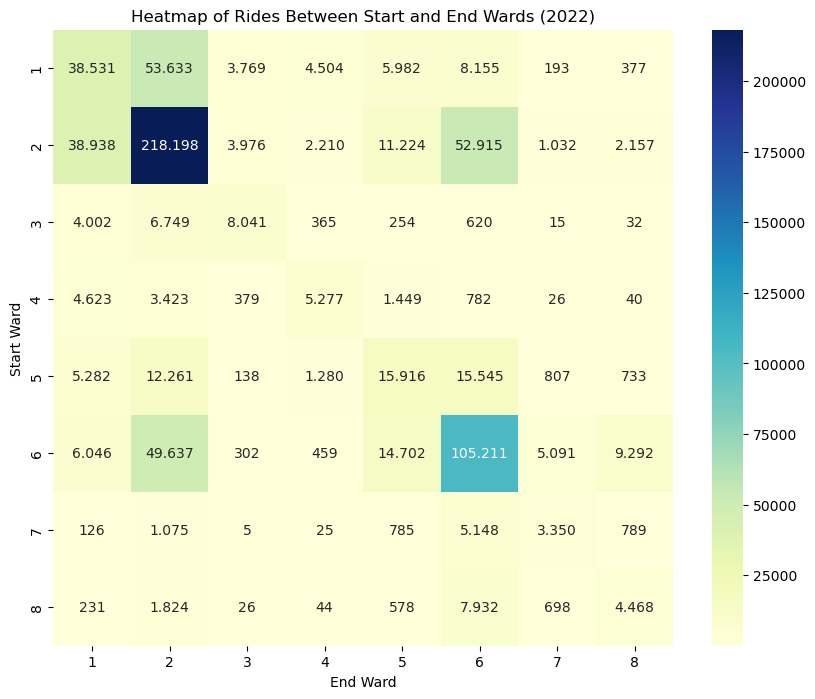

In [70]:
# Heatmap to show rides between wards
import seaborn as sns
import matplotlib.pyplot as plt
import locale

# Set locale to use dots as thousands separator
locale.setlocale(locale.LC_NUMERIC, 'de_DE.UTF-8')  # For German formatting

# Function to format numbers with dots as thousands separator
def format_with_dot(x):
    return locale.format_string("%d", x, grouping=True)

# Apply the format to the matrix using map
formatted_matrix = ward_matrix.stack().map(format_with_dot).unstack()

# Create a heatmap with formatted annotations
plt.figure(figsize=(10, 8))
sns.heatmap(
    ward_matrix, 
    annot=formatted_matrix, 
    cmap="YlGnBu", 
    fmt="s",  # Treats the annotations as strings
    cbar=True,
    annot_kws={"size": 10}  # Smaller font size for annotations
)

# Set labels and title
plt.title('Heatmap of Rides Between Start and End Wards (2022)')
plt.xlabel('End Ward')
plt.ylabel('Start Ward')

# Show the plot
plt.show()

### Top 50 Stations

In [82]:
# Ensure 'start_station_name' and 'end_station_name' are of type 'object' (string) to avoid the category type issue
fdf_gdf22['start_station_name'] = fdf_gdf22['start_station_name'].astype(str)
fdf_gdf22['end_station_name'] = fdf_gdf22['end_station_name'].astype(str)

# Count the number of rides per start station and sort in descending order
start_station_counts = fdf_gdf22.groupby("start_station_name").size().reset_index(name="ride_count")
start_station_counts_sorted = start_station_counts.sort_values(by="ride_count", ascending=False)

# Count the number of rides per end station and sort in descending order
end_station_counts = fdf_gdf22.groupby("end_station_name").size().reset_index(name="ride_count")
end_station_counts_sorted = end_station_counts.sort_values(by="ride_count", ascending=False)

# Combine the start and end stations counts and sort them in descending order
combined_station_counts = pd.concat([start_station_counts_sorted, end_station_counts_sorted]).groupby("start_station_name").sum().reset_index()

# Sort by total ride count in descending order and get the top 50 stations
top_50_stations = combined_station_counts.sort_values(by="ride_count", ascending=False).head(50)

# Display the result
print(top_50_stations)


                                    start_station_name  ride_count  \
220                    Columbus Circle / Union Station        8505   
303                        New Hampshire Ave & T St NW        8452   
60                                      15th & P St NW        8197   
279                                   Lincoln Memorial        7412   
98                                       1st & M St NE        6910   
265                          Jefferson Dr & 14th St SW        6669   
163                             4th St & Madison Dr NW        6550   
47                                      14th & V St NW        6220   
235  Eastern Market Metro / Pennsylvania Ave & 8th ...        6133   
335  Smithsonian-National Mall / Jefferson Dr & 12t...        6042   
167                                      5th & K St NW        6028   
292               Massachusetts Ave & Dupont Circle NW        6025   
191                                      8th & O St NW        5877   
263        Henry Bac

In [85]:
# Ensure 'start_station_name' and 'end_station_name' are of type 'object' (string) to avoid the category type issue
fdf_gdf['start_station_name'] = fdf_gdf['start_station_name'].astype(str)
fdf_gdf['end_station_name'] = fdf_gdf['end_station_name'].astype(str)

# Count the number of rides per start station and sort in descending order
start_station_counts = fdf_gdf.groupby("start_station_name").size().reset_index(name="ride_count")
start_station_counts_sorted = start_station_counts.sort_values(by="ride_count", ascending=False)

# Count the number of rides per end station and sort in descending order
end_station_counts = fdf_gdf.groupby("end_station_name").size().reset_index(name="ride_count")
end_station_counts_sorted = end_station_counts.sort_values(by="ride_count", ascending=False)

# Combine the start and end stations counts and sort them in descending order
combined_station_counts = pd.concat([start_station_counts_sorted, end_station_counts_sorted]).groupby("start_station_name").sum().reset_index()

# Sort by total ride count in descending order and get the top 50 stations
top_50_stations = combined_station_counts.sort_values(by="ride_count", ascending=False).head(50)

# Merge top 50 stations with the original dataframe to get coordinates (start_lat, start_lng)
# First, drop duplicates to keep only one row per station with its coordinates
unique_stations = fdf_gdf[['start_station_name', 'start_lat', 'start_lng']].drop_duplicates(subset='start_station_name', keep='first')

# Now merge the top 50 stations with the unique coordinates
top_50_stations_with_coords = top_50_stations.merge(
    unique_stations,
    on='start_station_name',
    how='left'
)

# Display the result

top_50_stations_with_coords.head()


,start_station_name,ride_count,end_station_name,start_lat,start_lng
0,0,28623,0,38.910000,-77.010000
1,Columbus Circle / Union Station,8818,0,38.896960,-77.004930
2,New Hampshire Ave & T St NW,8802,0,38.915544,-77.038252
3,15th & P St NW,8534,0,38.909801,-77.034427
4,Lincoln Memorial,8245,0,38.888255,-77.049436


### Top 100 stations

In [86]:
# Ensure 'start_station_name' and 'end_station_name' are of type 'object' (string) to avoid the category type issue
fdf_gdf22['start_station_name'] = fdf_gdf22['start_station_name'].astype(str)
fdf_gdf22['end_station_name'] = fdf_gdf22['end_station_name'].astype(str)

# Count the number of rides per start station and sort in descending order
start_station_counts = fdf_gdf22.groupby("start_station_name").size().reset_index(name="ride_count")
start_station_counts_sorted = start_station_counts.sort_values(by="ride_count", ascending=False)

# Count the number of rides per end station and sort in descending order
end_station_counts = fdf_gdf22.groupby("end_station_name").size().reset_index(name="ride_count")
end_station_counts_sorted = end_station_counts.sort_values(by="ride_count", ascending=False)

# Combine the start and end stations counts and sort them in descending order
combined_station_counts = pd.concat([start_station_counts_sorted, end_station_counts_sorted]).groupby("start_station_name").sum().reset_index()

# Sort by total ride count in descending order and get the top 100 stations
top_100_stations = combined_station_counts.sort_values(by="ride_count", ascending=False).head(100)

# Merge top 100 stations with the original dataframe to get coordinates (start_lat, start_lng)
# First, drop duplicates to keep only one row per station with its coordinates
unique_stations = fdf_gdf22[['start_station_name', 'start_lat', 'start_lng']].drop_duplicates(subset='start_station_name', keep='first')

# Now merge the top 100 stations with the unique coordinates
top_100_stations_with_coords = top_100_stations.merge(
    unique_stations,
    on='start_station_name',
    how='left'
)

# Display the result
print(top_100_stations_with_coords.head(100))

top_100_stations_with_coords.head()

                   start_station_name  ride_count end_station_name  start_lat  \
0     Columbus Circle / Union Station        8505                0  38.896960   
1         New Hampshire Ave & T St NW        8452                0  38.915544   
2                      15th & P St NW        8197                0  38.909801   
3                    Lincoln Memorial        7412                0  38.888255   
4                       1st & M St NE        6910                0  38.905358   
..                                ...         ...              ...        ...   
95                      1st & M St SE        2718                0  38.876893   
96  Rhode Island & Connecticut Ave NW        2714                0  38.905996   
97                     14th & L St NW        2710                0  38.903658   
98        Columbia Rd & Belmont St NW        2626                0  38.920669   
99                    3rd & Elm St NW        2616                0  38.917622   

    start_lng  
0  -77.0049

,start_station_name,ride_count,end_station_name,start_lat,start_lng
0,Columbus Circle / Union Station,8505,0,38.896960,-77.004930
1,New Hampshire Ave & T St NW,8452,0,38.915544,-77.038252
2,15th & P St NW,8197,0,38.909801,-77.034427
3,Lincoln Memorial,7412,0,38.888255,-77.049436
4,1st & M St NE,6910,0,38.905358,-77.005610


In [87]:
# Visualise the top 100 stations on a map

import folium
from folium import plugins
import numpy as np

# Function to get a color based on the ride count (you can adjust the color scale)
def get_marker_color(ride_count, max_ride_count, min_ride_count):
    # Normalize the ride count to a value between 0 and 1
    normalized = (ride_count - min_ride_count) / (max_ride_count - min_ride_count)
    
    # You can choose a color scale from any of the pre-defined scales or create a custom one
    # Example: Use a simple red to green scale
    color = f"#{int(255 * (1 - normalized)):02x}{int(255 * normalized):02x}00"
    
    return color

# Find the max and min ride counts to normalize the color scale
max_ride_count = top_100_stations_with_coords['ride_count'].max()
min_ride_count = top_100_stations_with_coords['ride_count'].min()

# Create a folium map centered around a general area (e.g., DC)
m = folium.Map(location=[38.90, -77.04], zoom_start=12, min_zoom=11, width="80%", height="60%")  # Adjust width and height here

# Loop through the top 100 stations and add them as circle markers with color based on ride count
for _, row in top_100_stations_with_coords.iterrows():
    # Get color based on the number of rides
    marker_color = get_marker_color(row['ride_count'], max_ride_count, min_ride_count)
    
    folium.CircleMarker(
        location=[row['start_lat'], row['start_lng']],
        radius=8,  # Adjust the radius size of the marker
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        fill_opacity=0.7,
        popup=f"{row['start_station_name']}: {row['ride_count']} rides",  # Shows station name and ride count
        tooltip=row['start_station_name']  # Tooltip shows the station name when hovered
    ).add_to(m)

# Save the map to an HTML file
m.save("top_100_stations_colored_map.html")

# If you are working in a Jupyter notebook or similar environment, display the map inline
m

### Top 100 Stations with Ward boundaries for Ward 2 and 7

In [88]:
import geopandas as gpd

# Load GeoJSON data
geojson_file = "wards_from_2022.geojson"
wards_gdf = gpd.read_file(geojson_file)

# 🔹 Convert ALL datetime columns to strings
for col in wards_gdf.select_dtypes(include=["datetime64[ns]"]).columns:
    wards_gdf[col] = wards_gdf[col].astype(str)


In [89]:
import json

# 🔹 Convert GeoDataFrame to a JSON string and force datetime conversion
wards_json = json.loads(json.dumps(wards_gdf.__geo_interface__, default=str))

In [90]:
import folium

# Create the map
m = folium.Map(location=[38.90, -77.04], zoom_start=12)

# 🔹 Add the cleaned GeoJSON to the map
folium.GeoJson(wards_json).add_to(m)

# Save and show the map
m.save("fixed_map.html")
m


### Station density by Ward

In [179]:
wards_gdf[['WARD', 'area_km2']].sort_values(by='WARD', ascending=True)

,WARD,area_km2
4,1,10.831974
3,2,30.231973
6,3,46.686393
7,4,38.462563
5,5,44.380534
1,6,28.996839
2,7,39.505974
0,8,53.199005


In [182]:
# Group by start_ward and count unique start_station_name
unique_stations_by_ward = fdf_gdf22.groupby('start_ward')['start_station_name'].nunique()

# Display the result
unique_stations_by_ward.reset_index(name='station_count')[['start_ward', 'station_count']]

,start_ward,station_count
0,1,47
1,2,106
2,3,28
3,4,25
4,5,45
5,6,75
6,7,33
7,8,35


In [184]:
# Calculate unique station counts per ward
unique_station_counts = fdf_gdf22.groupby('start_ward')['start_station_name'].nunique().reset_index()
unique_station_counts.columns = ['WARD', 'unique_stations_by_ward']

# Merge with ward area data
ward_density_unique = wards_gdf[['WARD', 'area_km2']].merge(unique_station_counts, on='WARD', how='left')

# Calculate station density (stations per km²)
ward_density_unique['station_density'] = ward_density_unique['unique_stations_by_ward'] / ward_density_unique['area_km2']

# Display the result
print(ward_density_unique[['WARD', 'station_density']].sort_values(by='WARD', ascending=True))

  WARD  station_density
4    1         4.339006
3    2         3.506222
6    3         0.599746
7    4         0.649983
5    5         1.013958
1    6         2.586489
2    7         0.835317
0    8         0.657907


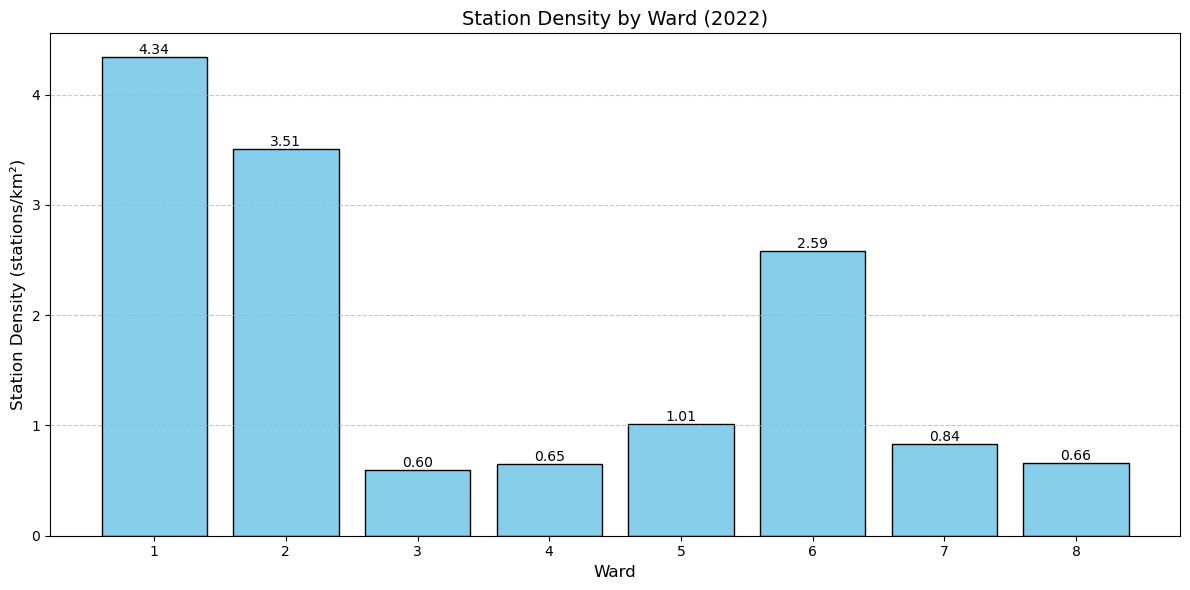

In [187]:
import matplotlib.pyplot as plt

# Assuming ward_density_unique is the dataframe with 'WARD' and 'station_density' columns
station_density_by_ward = ward_density_unique[['WARD', 'station_density']]

# Sort the dataframe by the 'WARD' column
station_density_by_ward = station_density_by_ward.sort_values(by='WARD')

# Creating a figure with a larger size
plt.figure(figsize=(12, 6))

# Plotting the bar chart
bars = plt.bar(station_density_by_ward['WARD'], station_density_by_ward['station_density'], color='skyblue', edgecolor='black')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom', ha='center', fontsize=10)

# Adding labels and title
plt.xlabel('Ward', fontsize=12)
plt.ylabel('Station Density (stations/km²)', fontsize=12)
plt.title('Station Density by Ward (2022)', fontsize=14)

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # To ensure everything fits without overlap
plt.show()

In [185]:
# # Station density - wrong code
# import pandas as pd
# import geopandas as gpd

# # Ensure ward column types match
# fdf_gdf22['start_ward'] = fdf_gdf22['start_ward'].astype(str)
# fdf_gdf22['end_ward'] = fdf_gdf22['end_ward'].astype(str)
# wards_gdf['WARD'] = wards_gdf['WARD'].astype(str)

# # Convert area to km² if needed
# wards_gdf['area_km2'] = wards_gdf['area'] / 1e6  # Assuming 'area' is in m²

# # Get unique stations per ward (start and end separately)
# unique_start_stations = fdf_gdf22[['start_ward', 'start_station_name']].drop_duplicates()
# unique_end_stations = fdf_gdf22[['end_ward', 'end_station_name']].drop_duplicates()

# # Count unique stations per ward
# start_station_counts = unique_start_stations.groupby('start_ward')['start_station_name'].nunique()
# end_station_counts = unique_end_stations.groupby('end_ward')['end_station_name'].nunique()

# # Combine counts
# station_counts = pd.DataFrame({
#     'start_station_count': start_station_counts,
#     'end_station_count': end_station_counts
# }).fillna(0)  # Ensure missing wards get 0 stations

# station_counts['total_station_count'] = station_counts['start_station_count'] + station_counts['end_station_count']

# # Merge with ward area
# ward_density = wards_gdf[['WARD', 'area_km2']].merge(station_counts, left_on='WARD', right_index=True, how='left')

# # Ensure missing values are filled (some wards may have no stations)
# ward_density.fillna({'total_station_count': 0}, inplace=True)

# # Calculate station density (stations per km²)
# ward_density['station_density'] = ward_density['total_station_count'] / ward_density['area_km2']

# # Display result
# print(ward_density[['WARD', 'station_density']])


In [186]:
# # Plot station density by ward - wrong code
# import matplotlib.pyplot as plt

# # Assuming ward_density is the dataframe with 'WARD' and 'station_density' columns
# station_density_by_ward = ward_density[['WARD', 'station_density']]

# # Sort the dataframe by the 'WARD' column
# station_density_by_ward = station_density_by_ward.sort_values(by='WARD')

# # Creating a figure with a larger size
# plt.figure(figsize=(12, 6))

# # Plotting the bar chart
# bars = plt.bar(station_density_by_ward['WARD'], station_density_by_ward['station_density'], color='skyblue', edgecolor='black')

# # Adding data labels on top of the bars
# for bar in bars:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', fontsize=10)

# # Adding labels and title
# plt.xlabel('Ward', fontsize=12)
# plt.ylabel('Station Density (stations/km²)', fontsize=12)
# plt.title('Station Density by Ward in Washington DC (2022)', fontsize=14)

# # Adding gridlines for better readability
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Display the plot
# plt.tight_layout()  # To ensure everything fits without overlap
# plt.show()


### Bike lane density by Ward (not relevant - data from 2023)

In [145]:
# pip install geopandas

In [146]:
# # Load the wards GeoJSON file
# import geopandas as gpd

# bike_lanes = gpd.read_file(r"C:\Users\raclo\Documents\Bootcamp\Project 3\DC Extra files\bicycle_lanes_dc.geojson")

In [154]:
# import geopandas as gpd
# import pandas as pd
# from shapely.geometry import Point

# # Convert fdf_gdf to GeoDataFrame using start station coordinates
# fdf_gdf22["geometry"] = fdf_gdf22.apply(lambda row: Point(row["start_lng"], row["start_lat"]), axis=1)
# fdf_gdf22 = gpd.GeoDataFrame(fdf_gdf22, geometry="geometry", crs="EPSG:4326")  # Ensure WGS84 projection

In [148]:
# fdf_gdf22 = fdf_gdf22.dropna(subset=["geometry"])

In [149]:
# def find_nearest_bike_lane(station_point):
#     """Finds the nearest bike lane for a given station using spatial indexing."""
#     if not isinstance(station_point, Point):
#         print(f"Invalid geometry: {station_point}")
#         return None  # Skip invalid geometries

#     possible_matches_index = list(bike_lanes_sindex.nearest(station_point.bounds, 1))  # Get nearest candidate
#     nearest_lane = bike_lanes.iloc[possible_matches_index[0]]
#     return nearest_lane


In [150]:
# print(fdf_gdf22.crs)  # Should be EPSG:4326
# print(bike_lanes.crs)  #

In [151]:
# def find_nearest_bike_lane(station_point):
#     """Finds the nearest bike lane for a given station using spatial indexing."""
#     if not isinstance(station_point, Point):
#         return None  # Ensure only valid Points are processed
    
#     possible_matches_index = list(bike_lanes_sindex.nearest(station_point, 1))  # Pass station_point directly
#     if possible_matches_index:
#         return bike_lanes_gdf.iloc[possible_matches_index[0]]
#     return None  # Return None if no match found

In [152]:
# # Ensure the 'geometry' column contains Points
# print(fdf_gdf22["geometry"].apply(lambda x: isinstance(x, Point)).value_counts())

# # Now you can access the 'geometry' column properly
# fdf_gdf22["longitude"] = fdf_gdf22["geometry"].apply(lambda x: x.x if isinstance(x, Point) else None)
# fdf_gdf22["latitude"] = fdf_gdf22["geometry"].apply(lambda x: x.y if isinstance(x, Point) else None)

# # Check if the 'longitude' and 'latitude' were correctly extracted
# print(fdf_gdf22[["longitude", "latitude"]].head())

In [153]:
# import geopandas as gpd

# # Load the wards GeoJSON and reproject to a projected CRS (if needed)
# wards_gdf = gpd.read_file("wards_from_2022.geojson")
# wards_gdf = wards_gdf.to_crs(epsg=3395)  # Reproject to a projected CRS (e.g., EPSG:3395)

# # Load bike lanes GeoJSON and reproject to the same CRS as wards
# bike_lanes_gdf = gpd.read_file(r"C:\Users\raclo\Documents\Bootcamp\Project 3\DC Extra files\bicycle_lanes_dc.geojson")
# bike_lanes_gdf = bike_lanes_gdf.to_crs(epsg=3395)  # Reproject to match the CRS of wards

# # Step 2: Count the number of bike lanes in each ward
# # Perform a spatial join to associate bike lanes with wards
# bike_lanes_with_ward = gpd.sjoin(bike_lanes_gdf, wards_gdf, how="inner", predicate="within")

# # Step 3: Calculate the area of each ward (in square meters)
# wards_gdf['area'] = wards_gdf.geometry.area

# # Step 4: Calculate the bike lane density (per km²)
# # First, calculate the bike lane density as the count of bike lanes per ward
# bike_lane_density = bike_lanes_with_ward.groupby("WARD").size().reset_index(name="bike_lane_count")

# # Merge with wards_gdf to add area information
# bike_lane_density = bike_lane_density.merge(wards_gdf[['WARD', 'area']], on="WARD")

# # Calculate bike lane density (count per km² or m²)
# # Assuming area is in square meters, divide by 1,000,000 to get density per km²
# bike_lane_density["density_per_km2"] = bike_lane_density["bike_lane_count"] / (bike_lane_density["area"] / 1e6)

# # Step 5: Display the result
# print(bike_lane_density)

In [188]:
# saving the dataframe
fdf_gdf22.to_csv('fdf_gdf22.csv')